![](https://images.pexels.com/photos/2433587/pexels-photo-2433587.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940)

# Simple OpenCV Camera

Kevin J. Walchko, Phd

21 Dec 2019

---

```python
#!/usr/bin/env python

import numpy as np
import cv2
from matplotlib import pyplot as plt
import time

cam = cv2.VideoCapture(0)

if not cam.isOpened():
    print("... ops, failed to open camera")
    exit(1)

try:
    while True:
        ok, frame = cam.read()
        if ok:
            # cv2.imshow('movie', frame)
            k = cv2.waitKey(1)
            if k == ord('q'):
                cam.release()            # close camera
                cv2.destroyAllWindows()  # clean up GUI
                exit()
        time.sleep(0.033)
except KeyboardInterrupt:
    pass
        
cam.release()
```

In [9]:
import numpy as np
import cv2
import time
import platform

%matplotlib inline
from matplotlib import pyplot as plt

from ipywidgets import Video

In [2]:
frames = []

cam = cv2.VideoCapture(0)

if not cam.isOpened():
    print("... ops, failed to open camera")
    raise Exception

for _ in range(10):
    ok, frame = cam.read()
    if ok:
        frames.append(frame)
        time.sleep(1)
        
cam.release()

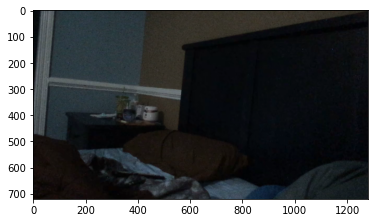

In [14]:
plt.imshow(frames[0]);

In [11]:
def videoWrite(frames, fname='out.mp4', fps=30):
    frame_height, frame_width, _ = frames[0].shape

    # pick a good encoder for the current OS
    sys = platform.system()
    if sys in ['Darwin']:  # this is on macOS
        fourcc = 'avc1'
    else:  # this is for Windoze
        fourcc = 'mjpg'

    out = cv2.VideoWriter(
        fname,
        cv2.VideoWriter_fourcc(*fourcc), 
        fps, 
        (frame_width,frame_height))
    for frame in frames:
        out.write(frame)
    out.release()

In [12]:
videoWrite(frames, fps=1)

In [13]:
Video.from_file("out.mp4")

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x07\x1d\x95mdat\x0…